In [3]:
#Importing our Packages
import glob

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget

Found automatic threshold t = 0.3339926221420952.


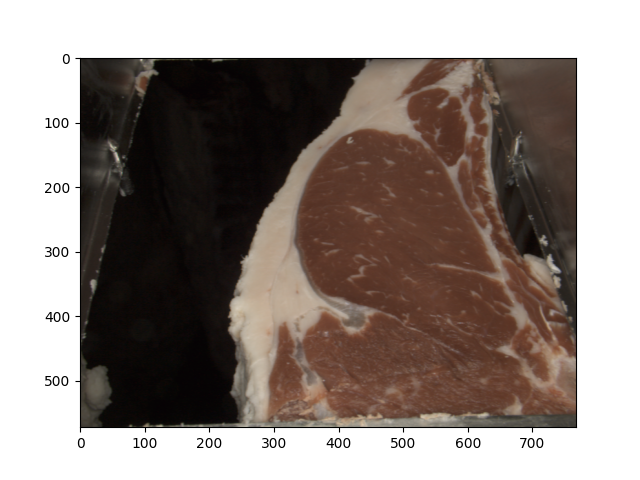

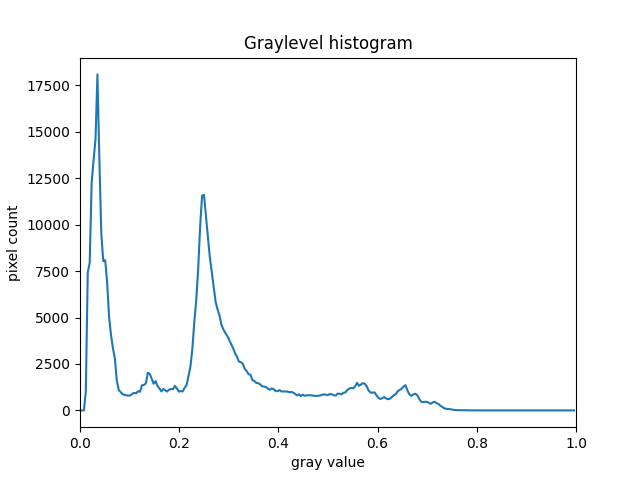

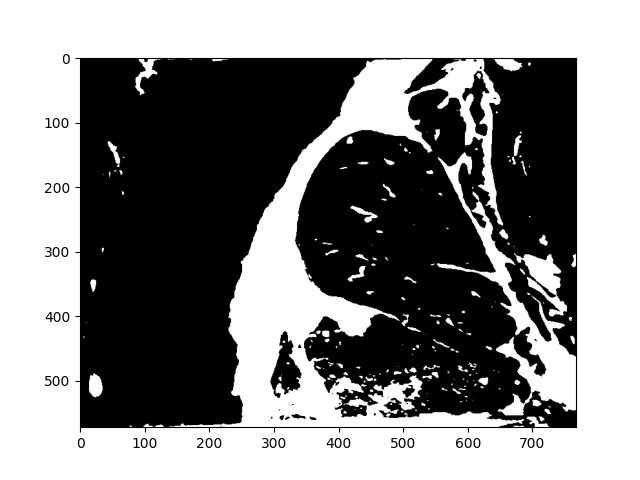

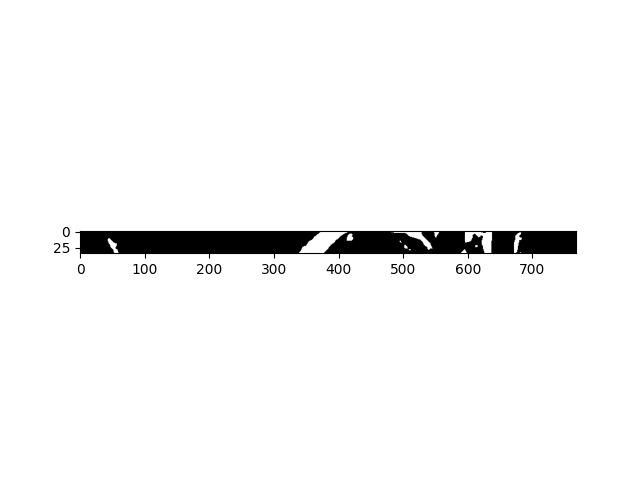

In [12]:
#Data Cleaning?


# load the image
maize_roots = iio.imread(uri="data\Path2\Path2-Model Training\Training-PNG\\00001400-1.png")

fig, ax = plt.subplots()
ax.imshow(maize_roots)

# convert the image to grayscale
gray_image = ski.color.rgb2gray(maize_roots)

# blur the image to denoise
blurred_image = ski.filters.gaussian(gray_image, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Graylevel histogram")
ax.set_xlabel("gray value")
ax.set_ylabel("pixel count")
ax.set_xlim(0, 1.0)

# perform automatic thresholding
t = ski.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

# create a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

height_of_image = binary_mask.shape[0]
width_of_image = binary_mask.shape[1]
bottom_crop = height_of_image // 32 * 7
top_crop = height_of_image // 32 * 9

cropped_binary_mask = binary_mask[bottom_crop: top_crop, 0:width_of_image]

fig, ax = plt.subplots()
ax.imshow(cropped_binary_mask, cmap="gray")

# apply the binary mask to select the foreground
# selection = maize_roots.copy()
# selection[binary_mask] = 0

# fig, ax = plt.subplots()
# ax.imshow(selection)

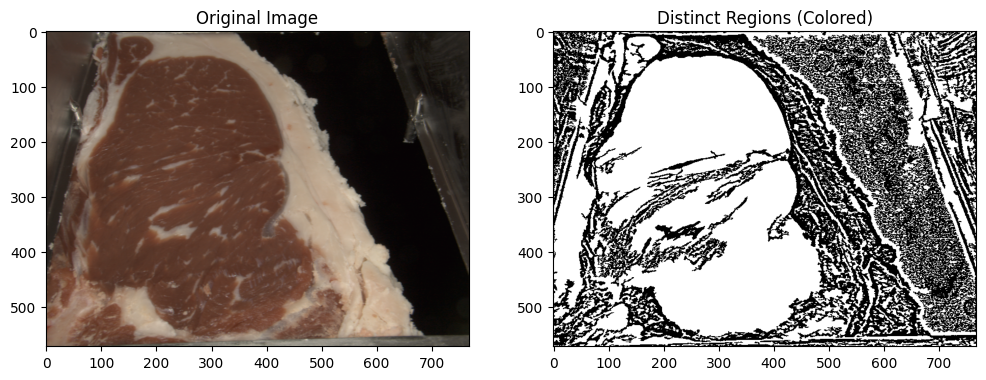

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('data\Path2\Path2-Model Training\Training-PNG\\00001277-2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 1.7)

# Find contours in the binary mask
contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a white background
contour_image = np.zeros_like(gray)
cv2.drawContours(contour_image, contours, -1, (255), thickness=cv2.FILLED)

# Invert the image to get the segmented regions
segmented_image = contour_image

# Perform connected components analysis on the dilated image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(segmented_image, connectivity=8)

# # Create a blank image to store the distinct regions
# distinct_regions = np.zeros_like(segmented_image)

# # Loop through each label (excluding the background label 0)
# for label in range(1, num_labels):
#     # Extract the region corresponding to the current label
#     region = np.where(labels == label, 255, 0).astype(np.uint8)
#     distinct_regions = cv2.add(distinct_regions, region)

# # Generate random colors for each label
# colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

# # Create a blank image to store the colored regions
# colored_regions = np.zeros((distinct_regions.shape[0], distinct_regions.shape[1], 3), dtype=np.uint8)

# # Assign random colors to each labeled region
# for label in range(1, num_labels):
#     mask = labels == label
#     colored_regions[mask] = colors[label]

def get_largest_region(num_labels, labels):
    # Sort the regions based on their area (excluding the background label 0)
    sorted_regions = sorted([(i, stats[i, cv2.CC_STAT_AREA]) for i in range(1, num_labels)], key=lambda x: x[1], reverse=True)

    # Get the label of the largest region
    largest_region_label = sorted_regions[0][0]

    # Create a binary mask for the largest region
    largest_region_mask = np.where(labels == largest_region_label, 255, 0).astype(np.uint8)

    return largest_region_mask

largest_region = get_largest_region(num_labels, labels)

# Perform morphological opening to remove smaller parts
kernel = np.ones((5, 5), np.uint8)
#largest_region = cv2.morphologyEx(largest_region, cv2.MORPH_OPEN, kernel)

num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(largest_region, connectivity=8)

#largest_region = get_largest_region(num_labels, labels)

# Perform morphological opening to remove smaller parts
kernel = np.ones((5, 5), np.uint8)
#largest_region = cv2.morphologyEx(largest_region, cv2.MORPH_OPEN, kernel)

# Display the result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
#plt.imshow(cv2.cvtColor(colored_regions, cv2.COLOR_BGR2RGB))
plt.imshow(segmented_image, cmap='gray')
plt.title('Distinct Regions (Colored)')

plt.show()

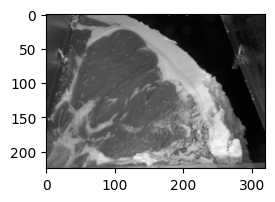

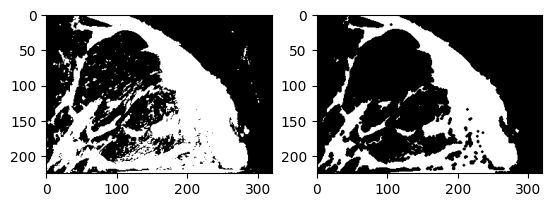

In [1]:
from skimage.color import rgb2gray
from skimage.morphology import erosion, opening
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

image=Image.open('data\Path2\Path2-Model Training\Training-PNG\\00001278-2.png')
image=image.resize((320,225))
image=np.array(image)
plt.figure(figsize=(3,2))
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

def segment (image):
    # What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
    arr=gray.flatten()
    for i in range(len(arr)):
        if arr[i]>=arr.mean() :
            arr[i]=1
        else:
            arr[i]=0
    gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

    ax1.imshow(gray_segmented,cmap='gray')

    return gray_segmented

def erode(image):
    element = np.array([[0,0,0,0,0,0],
                        [0,0,1,1,0,0],
                        [0,1,1,1,1,0],
                        [0,1,1,1,1,0],
                        [0,0,1,1,0,0],
                        [0,0,0,0,0,0]])
    
    eroded = erosion(image, element)
    ax2.imshow(eroded,cmap='gray')

    return eroded

fig, (ax1, ax2) = plt.subplots(1, 2)
gray_seg_image = segment(gray)
erode(gray_seg_image)
plt.show()

In [ ]:
#Model Evaluation